# **Practico Mentoria - Aprendizaje Supervisado**

Se propone la elaboración de un informe o presentación, en formato estatico:
* PDF
* Markdowns
* Google Docs

Que responda a las cuestiones solicitadas en cada seccion de esta **Jupyter Notebook**.

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.  
Por lo cual debe estar redactado de forma consisa y comprensible.

## **Referencias**

* https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/
* https://www.analyticslane.com/2018/08/15/manipulacion-series-temporales-con-pandas/
* http://www.escuela-verano.otrasenda.org/wp-content/uploads/2015/06/curso_series.pdf
* https://medium.com/datos-y-ciencia/modelos-de-series-de-tiempo-en-python-f861a25b9677

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [2]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 5)})

In [3]:
filename = "https://raw.githubusercontent.com/diplodatos2020/Introduccion_Mentoria/master/dataset_inf_telec_20200501T130000_20200727T010000_v1.csv"

In [4]:
df = pd.read_csv(
    filename,
    dtype={
        'ID_EQUIPO': int,
        'PUNTO_MEDICION': str,
        'CAPACIDAD_MAXIMA_GBS': float,
        'PASO': int,
        'LATENCIA_MS': float,
        'PORCENTAJE_PACK_LOSS': float,
        'INBOUND_BITS': np.float64,
        'OUTBOUND_BITS': np.float64,
        'MEDIDA': str,
    },
    index_col='FECHA_HORA',
    parse_dates=[
        'FECHA_INICIO_MEDICION',
        'FECHA_HORA',
        'FECHA_FIN_MEDICION',
    ],
    na_values=['NaN']
)

print(df.shape)
display(df.head(10))

(61548, 11)


,ID_EQUIPO,PUNTO_MEDICION,CAPACIDAD_MAXIMA_GBS,FECHA_INICIO_MEDICION,FECHA_FIN_MEDICION,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_BITS,OUTBOUND_BITS,MEDIDA
FECHA_HORA,,,,,,,,,,,
2020-05-01 03:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.636025,0.0,2.574323e+06,5.511033e+06,MB
2020-05-01 05:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 01:00:00.000,2020-05-28 13:00:00.000,7200,0.604169,0.0,2.890153e+06,4.081183e+06,MB
2020-05-01 07:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.630580,0.0,2.152505e+06,4.904134e+06,MB
2020-05-01 09:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.643044,0.0,6.436357e+06,1.015017e+07,MB
2020-05-01 11:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.620542,0.0,3.173940e+06,4.403766e+06,MB
2020-05-01 13:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.611687,0.0,1.818024e+06,5.041605e+06,MB
2020-05-01 15:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.647121,0.0,2.269738e+06,3.317918e+06,MB
2020-05-01 17:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.613206,0.0,3.333695e+06,5.551954e+06,MB
2020-05-01 19:00:00,25,ABA - Abasto Cliente,1.0,2020-05-01 00:59:59.995,2020-05-28 12:59:59.995,7200,0.619800,0.0,4.434273e+06,7.047717e+06,MB


In [23]:
print(df.index.min())

print(df.index.max())

2020-07-01 01:00:00
2020-07-27 01:00:00


---

## **Basic Time Series Forecasting**

En este practico aplicaremos métodos básicos de forecasting.

Elija algun `PUNTO_MEDICION`, por ejemplo **BAZ - Yocsina**.

Vamos a hacer forecasting sobre la variable `INBOUND_BITS` de dicho punto de medición.

In [21]:
df = df.loc['2020-07-01 00:00:00':]

In [22]:
df = df[df.PUNTO_MEDICION == 'BAZ - Yocsina']
df_new = df[['INBOUND_BITS']]

print(df_new.shape)
df_new

AttributeError: 'DataFrame' object has no attribute 'PUNTO_MEDICION'

In [85]:
df.resample('W').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

In [10]:
df.index = df.index.to_period(freq='H')

In [73]:
df.index

Float64Index([6664197350.3, 4090508959.6, 2192749883.4, 1424330916.8,
              1861970304.6, 3235860938.7, 4240636445.5, 4966500400.9,
              5507463125.7, 5374749505.0,
              ...
              1439591235.0, 1267029324.8, 2538480816.4, 3332427687.3,
              3906616838.6, 4849683312.1, 5238562475.4, 6657298187.7,
              7150991127.7, 6873960482.3],
             dtype='float64', name='INBOUND_BITS', length=313)

In [84]:
df3 = df.iloc[64]
print(type(df3.index))
print(len(df3.index.to_list()))

<class 'pandas.core.indexes.base.Index'>
0


In [82]:
df3.index

Index([], dtype='object')

In [57]:
df.tail()

,INBOUND_BITS
FECHA_HORA,
2020-07-26 17:00,4.849683e+09
2020-07-26 19:00,5.238562e+09
2020-07-26 21:00,6.657298e+09
2020-07-26 23:00,7.150991e+09
2020-07-27 01:00,6.873960e+09


In [7]:
from datetime import datetime

Para el modelado de series de tiempo univariadas, es mejor trabajar con un Pandas Series en lugar de un Dataframe

In [8]:
y = df['INBOUND_BITS']
y.head()


FECHA_HORA
2020-07-01 01:00:00    6.664197e+09
2020-07-01 03:00:00    4.090509e+09
2020-07-01 05:00:00    2.192750e+09
2020-07-01 07:00:00    1.424331e+09
2020-07-01 09:00:00    1.861970e+09
Name: INBOUND_BITS, dtype: float64

In [90]:
y.describe()

count    3.130000e+02
mean     4.262534e+09
std      1.895935e+09
min      1.150010e+09
25%      2.581562e+09
50%      4.445862e+09
75%      5.889731e+09
max      7.225044e+09
Name: INBOUND_BITS, dtype: float64

In [94]:
series_value = y.values
series_value

array([6.66419735e+09, 4.09050896e+09, 2.19274988e+09, 1.42433092e+09,
       1.86197030e+09, 3.23586094e+09, 4.24063645e+09, 4.96650040e+09,
       5.50746313e+09, 5.37474950e+09, 6.08007175e+09, 6.78371351e+09,
       6.50656443e+09, 3.80264368e+09, 1.92898590e+09, 1.24060069e+09,
       1.55097091e+09, 2.97577098e+09, 3.73797188e+09, 4.33182298e+09,
       4.78437175e+09, 4.90036540e+09, 5.88802677e+09, 6.62243802e+09,
       6.49007474e+09, 3.70425278e+09, 1.84685365e+09, 1.24765142e+09,
       1.54668902e+09, 3.00107776e+09, 3.81390205e+09, 4.56717432e+09,
       5.19186387e+09, 4.97437954e+09, 5.83855513e+09, 6.57214625e+09,
       6.64671178e+09, 4.30089516e+09, 2.23685035e+09, 1.30397534e+09,
       1.39165140e+09, 2.77327344e+09, 3.60307879e+09, 4.27029409e+09,
       4.85635218e+09, 5.11141526e+09, 6.23322864e+09, 6.60811411e+09,
       6.74220399e+09, 4.71706088e+09, 2.35529157e+09, 1.33808750e+09,
       1.28978428e+09, 2.58156237e+09, 3.50822395e+09, 3.73682798e+09,
      

In [95]:
type(series_value)

numpy.ndarray

In [96]:
y.size

313

In [16]:
y.tail().INBOUND_BITS

AttributeError: 'Series' object has no attribute 'INBOUND_BITS'

In [13]:
y.resample('W').mean()

AttributeError: 'Series' object has no attribute 'INBOUND_BITS'

In [108]:
y_mean = y.rolling(window = 30).mean()

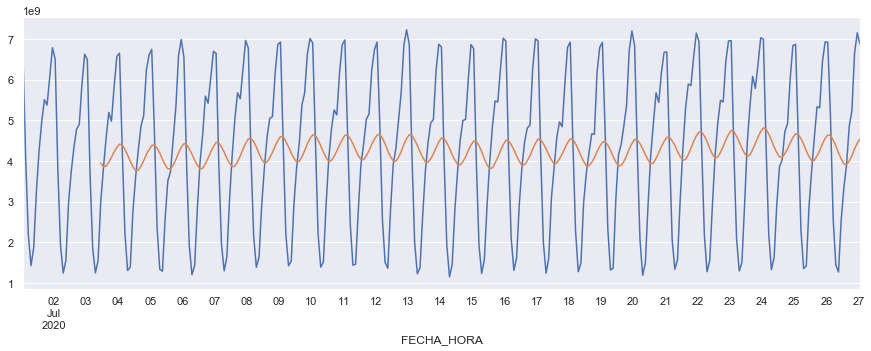

In [109]:
y.plot()
y_mean.plot()

In [ ]:
y_test = y
y_train = 

In [19]:
y

FECHA_HORA
2020-07-01 01:00:00    6.664197e+09
2020-07-01 03:00:00    4.090509e+09
2020-07-01 05:00:00    2.192750e+09
2020-07-01 07:00:00    1.424331e+09
2020-07-01 09:00:00    1.861970e+09
                           ...     
2020-07-26 17:00:00    4.849683e+09
2020-07-26 19:00:00    5.238562e+09
2020-07-26 21:00:00    6.657298e+09
2020-07-26 23:00:00    7.150991e+09
2020-07-27 01:00:00    6.873960e+09
Name: INBOUND_BITS, Length: 313, dtype: float64

NameError: name 'x_train' is not defined

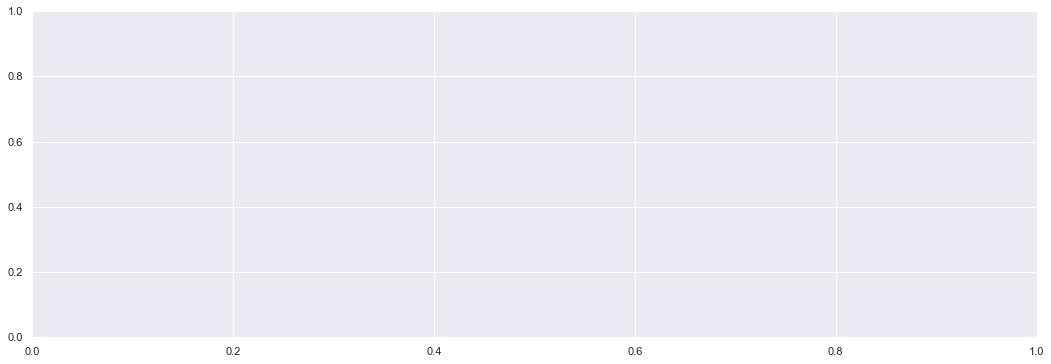

In [11]:
fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,1,1)
x_train.tail(100).plot(ax=ax, label='T')
y_test.plot(ax=ax,label='testing')
ax.legend()
plt.show()

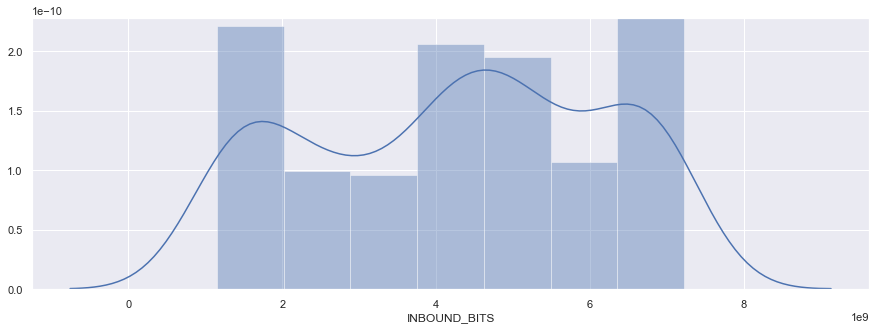

In [101]:
sns.distplot(y)

#### **Análisis exploratorio de datos**

Plotear el grafico de la serie de tiempo.

In [35]:
print("population --> len:", len(y), "| mean:", round(y.mean()), " | std:", round(y.std()))
w = 30
print("moving --> len:", w, " | mean:", round(y.ewm(span=w).mean()[-1]), " | std:", round(y.ewm(span=w).std()[-1]))

population --> len: 313 | mean: 4262533622  | std: 1895935183
moving --> len: 30  | mean: 4637162775.0  | std: 1976926618.0


In [30]:
plot_y(y, plot_ma=True, plot_intervals=True, window=w, figsize=(15,5))

NameError: name 'plot_y' is not defined

In [23]:
plot_y

NameError: name 'plot_y' is not defined

#### **Random Walk**

Usaremos el método Random Walk para ilustrar el proceso que seguiremos para generar forecast.

https://medium.com/analytics-vidhya/time-series-forecasting-with-random-walk-58e84c93058b

Para la predicción (forecast) de un valor, se usa la última observación de la serie temporal:

$$
\hat{y}_{t + h} = y_{t}
$$

1. Especificamos el **horizon (h)** para el forecast.
2. Creamos un rango de periodos empezando por el periodo siguiente al de la ultima observacion del dataset.
3. Generamos las predicciones y las guardamos en el rango de periodos creado anteriormente.

A continuación, generamos pronósticos puntuales para 10 horas después del final de la serie.

In [44]:
df

,INBOUND_BITS
FECHA_HORA,
2020-07-01 01:00,6.664197e+09
2020-07-01 03:00,4.090509e+09
2020-07-01 05:00,2.192750e+09
2020-07-01 07:00,1.424331e+09
2020-07-01 09:00,1.861970e+09
...,...
2020-07-26 17:00,4.849683e+09
2020-07-26 19:00,5.238562e+09
2020-07-26 21:00,6.657298e+09


In [45]:
def utils_generate_rw(y0, n, sigma, ymin=None, ymax=None):
    rw = [y0]
    for t in range(1, n):
        yt = rw[t-1] + np.random.normal(0,sigma)
        if (ymax is not None) and (yt > ymax):
            yt = rw[t-1] - abs(np.random.normal(0,sigma))
        elif (ymin is not None) and (yt < ymin):
            yt = rw[t-1] + abs(np.random.normal(0,sigma))
        rw.append(yt)
    return rw

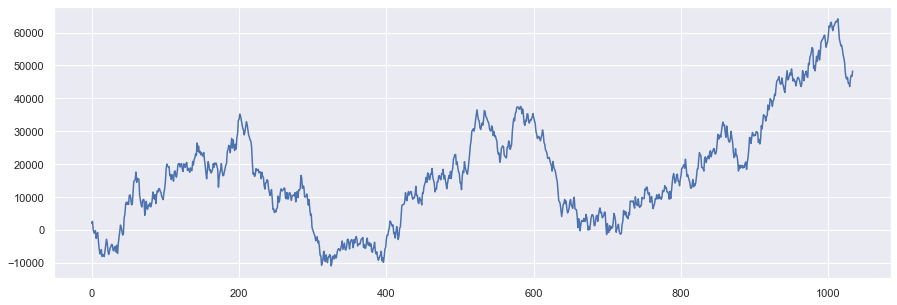

In [46]:
rw = utils_generate_rw(y0=1951, n=1034, sigma=1585, ymin=None,
                       ymax=None)
plt.plot(rw)

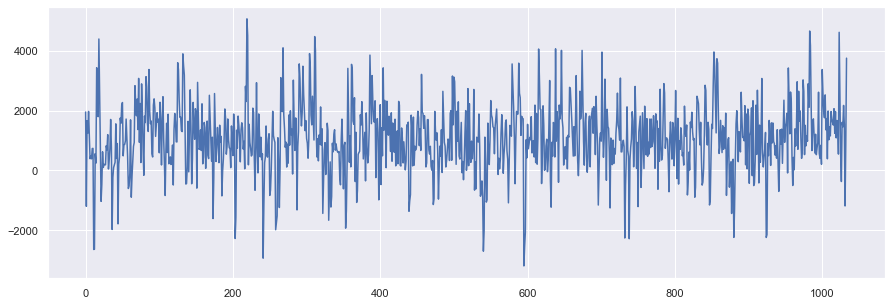

In [47]:
rw = utils_generate_rw(y0=1951, n=1034, sigma=1585, ymin=0,
                       ymax=2000)
plt.plot(rw)

#### **EXTRA: Seasonal Random Walk**

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

Si la serie presenta comportamientos estacionales, en lugar de usar la ultima observacion, usamos el ultimo valor correspondiente a la misma "estacion" actual:

$$
\hat{y}_{t + h} = y_{t + h - km}
$$

Donde:
* $m$ representa la longitud de la estacion
* $k$ es el "salto" a la estacion correspondiente:

$$
k = \floor{\frac{h - 1}{m + 1}}
$$

In [37]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
error = mean_squared_error(test, predictions)
print('Persistence MSE: %.3f' % error)

Persistence MSE: 1.000


---

#### **Exponential Smoothing**

* https://en.wikipedia.org/wiki/Exponential_smoothing
* https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

En el modelo de Exponential Smoothing, las predicciones son promedios pesados de observaciones pasadas, donde los pesos decaen exponencialmente cuando nos movemos al pasado:
$$
\hat{y}_{t + 1} = l_t \\
l_t = \alpha y_t + (1 - \alpha) l_{t - 1}
$$

Donde:

Asumimos que:
* $l_0$ está dado
* 0 $< \alpha <$ 1

El método se suele usar cuando los datos no tienen patrones de tendencia ni estacional claros.

In [ ]:
# TODO

In [43]:

from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
